In [1]:
import silq
silq.initialize("EWJN", mode='analysis')
%matplotlib notebook

Initializing imports
Initializing functions
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


<IPython.core.display.Javascript object>


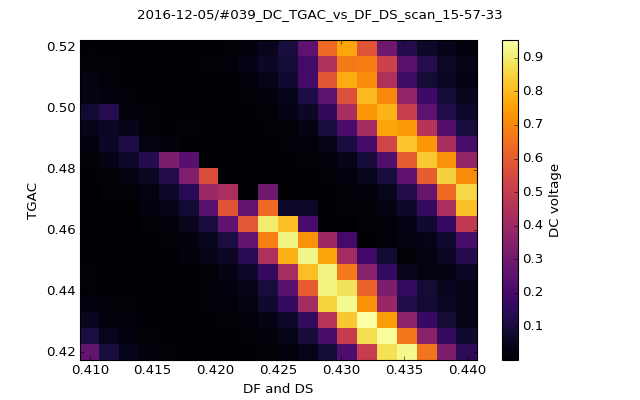

In [3]:
data = qc.load_data('2016-12-05/#039_DC_TGAC_vs_DF_DS_scan_15-57-33')
qc.MatPlot(data.DC_voltage)